# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

In [1]:
import sys
!{sys.executable} -m pip install qmsolve

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt>?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

   1. H is an operator (matrix) the average of which gives energy.  It defines the eigenvalue differential or matrix equation to obtain wave funtions and energies of a given system.  It is made of two parts: (1) kinetic energy operator $ \frac{p^2}{2m} $, where $ p = -i \frac{d}{dx} $ (in 1D) is momentum operator, and (2) potential energy function V(x)  (in 1D), so that we get $ H = \frac{p^2}{2m} + V(x) $.  The differential or matrix equaion is formulated as: $ H \psi_n(x) = E_n \psi_n(x) $ (in 1D) (see https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics))
   
   2. This function defines energy related to the Hooke's $ F = -k x $, this is equaion for a force due to a spring, where k is force constant, i.e. a property of a given spring.  The actual (potential) energy of that system is $ U(x) = \frac{k x^2}{2} $ (see: https://en.wikipedia.org/wiki/Hooke%27s_law)
   
   3. eigenstates describes the first 30 eigenstates (wave functions and energies).  These are solution to Schrodinger euqtion with V defined in harmonic_oscillator function $ H \psi_n(x) = E_n \psi_n(x)$.  The $ |\psi(x)|^2 $ describe probability distribution a quantumparticle (the probability to find it at a given $ [x,x+dx] $ interval.  The first (lowest energy function) is even and does not intersect the x axis. The next function is odd and intersects it once, the next (3rd) is even and intersects it twice and so on (see: https://en.wikipedia.org/wiki/Wave_function).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.15700531005859375
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


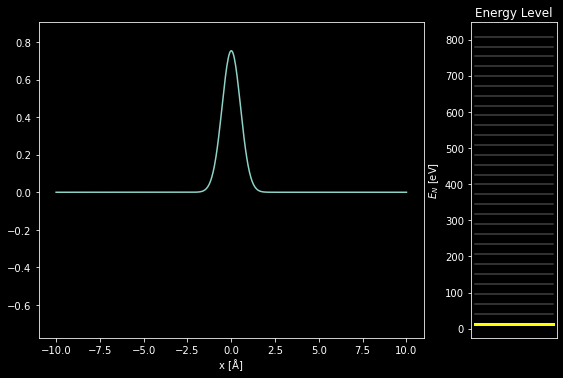

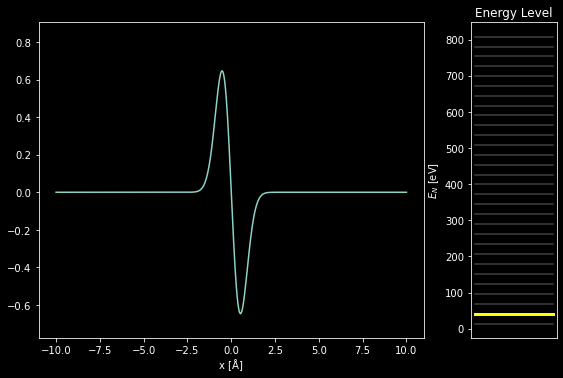

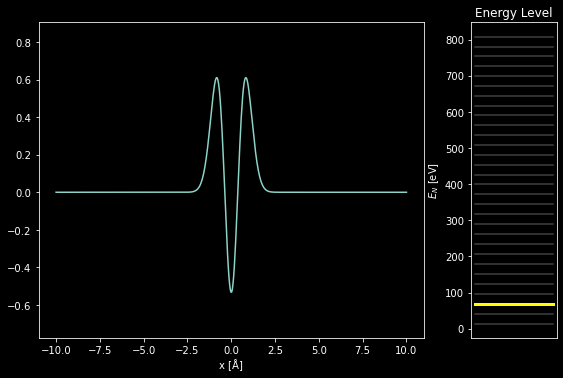

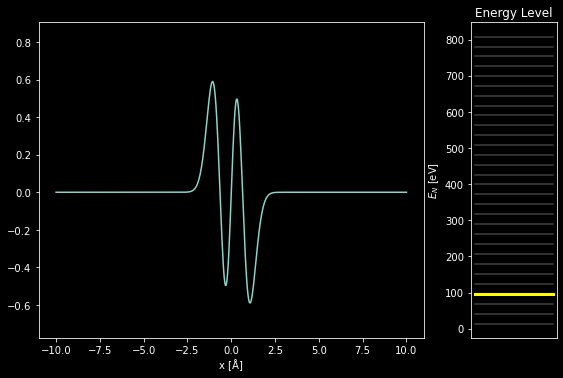

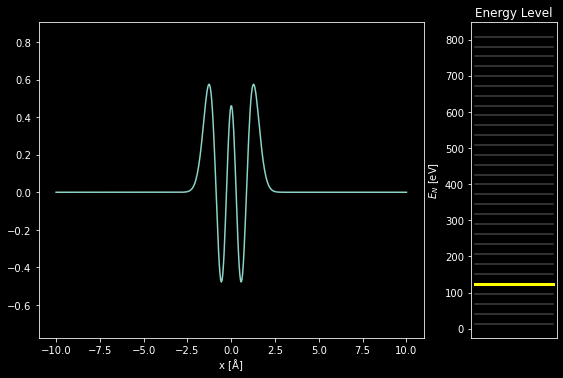

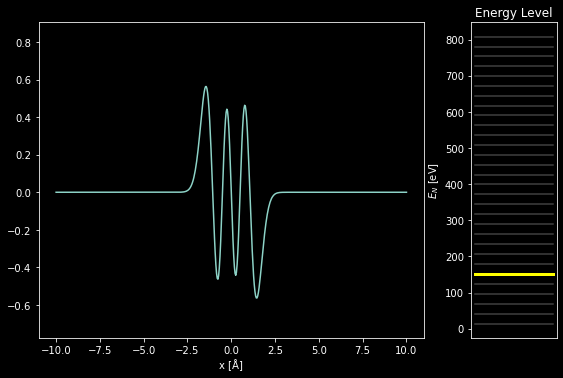

In [3]:
#=========================================================================================================#
#We define the Hamiltonian of a single particle confined in an harmonic oscillator potential. 
#Then, we compute its eigenstates.
#=========================================================================================================#

# 2
# This function defines energy related to the Hooke's
# F = -k x
# this is equaion for a force due to a spring, where k is force constant,
# i.e. a property of a given spring
# The actual (potential) energy of that system is
# U(x) = k x^2 / 2
#
# see: https://en.wikipedia.org/wiki/Hooke%27s_law

# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)


# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)

#4
# (Optional: Visualize a specific eigenstate)
visualization.plot_eigenstate(0) # ground state - bottom most energy and function
visualization.plot_eigenstate(1) # first excited state (second energy and function
visualization.plot_eigenstate(2) # ...
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(4)
visualization.plot_eigenstate(5)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

   5. X axis has position of quantum particle (random event) the average position is found by averaging x with the probabiliy density disctribution = $ |\psi(x)|^2 $.
   6. It shows the wave function, because it goes to negative values for all energies/states except the first (ground state).


### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Computing...
Took 0.0619809627532959
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


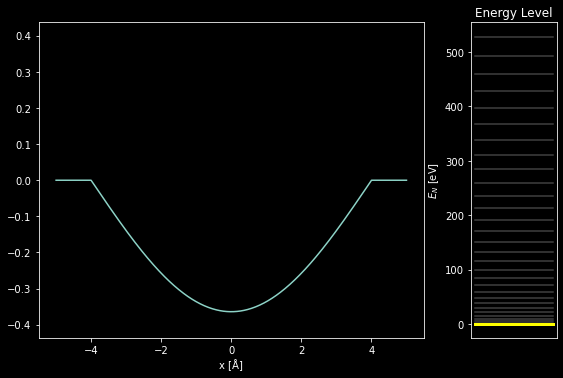

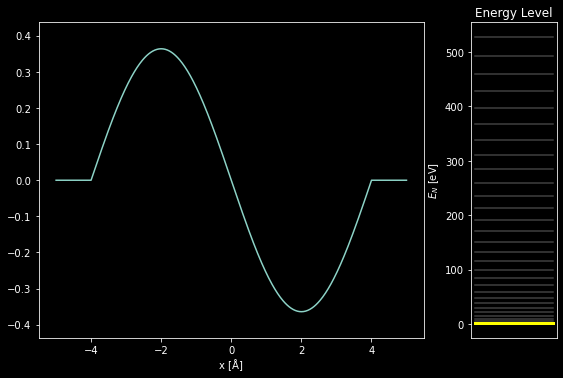

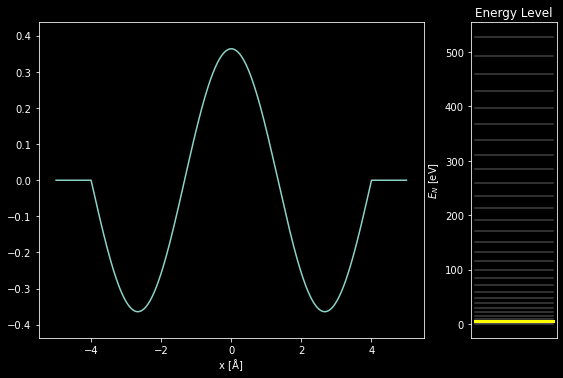

In [4]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

#7
# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(2)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class on 4/17)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

8. The wave function of the infinite potential well are exactly zero outside of the potential well. Also, the energies are no longer equally spaced - denser at the bottom.
9. We see that the groun state (the bottom most, n=1, wave function) has one maximum. The next (n=2) function has two extremal points.  The next (n=3) has 3 extremal points and so on. Thus the number of extremal points is equal to n (if it counts from 1).

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

11. Yes, it can have some non-zero probability = $ |\psi|^2 $ to be outside of the finite well, because unlike in the infinite potential case, here $ \psi $ does not go to 0 outside of the potential. Yet, it is small and decay towards zero as you go further outside of the well, so that the probability to be outside of the well is small as well.

Computing...
Took 0.14038729667663574
[-99.46196128 -97.84841684 -95.16111966 -91.40312402 -86.57900998
 -80.6952574  -73.76085556 -65.78831375 -56.79540628 -46.80837354
 -35.86827979 -24.04497244 -11.47164926   1.55842594  14.32016055
  25.37305797  34.41418043  44.34611226  57.42339255  72.80926808
  89.20594928 105.79649393 122.1353246  138.37322185 155.27661393
 173.58579849 193.46023361 214.60112929 236.57991836 259.00942014]


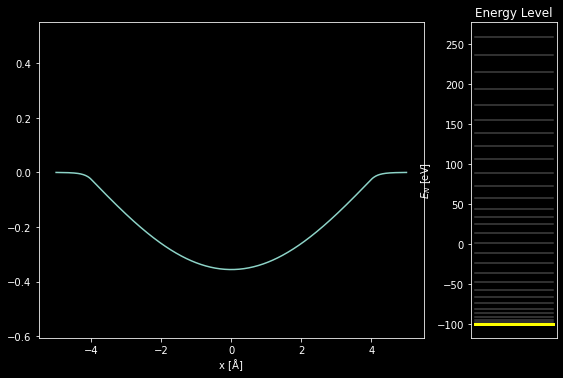

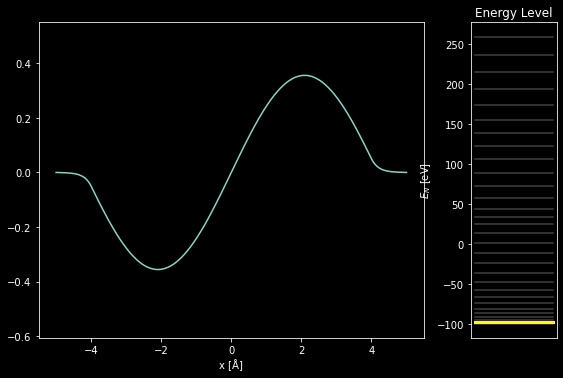

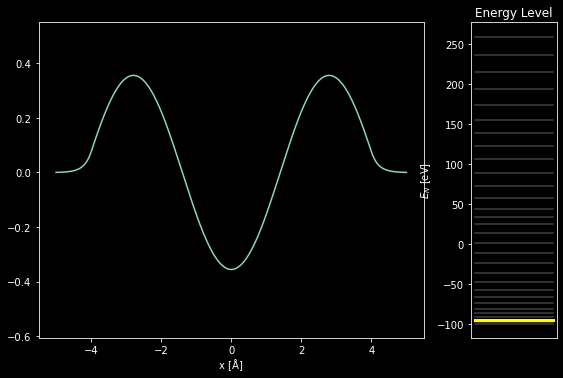

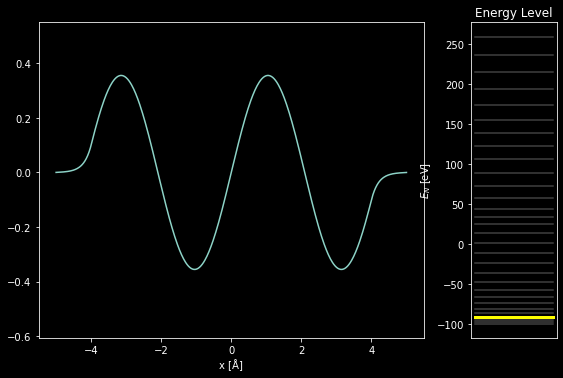

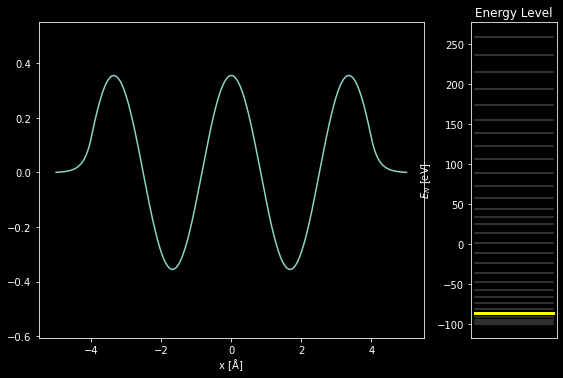

In [5]:
#10
#Finite sq. well potential

def finite_square_well(particle):
    V0 = -100 * eV # depth of the well
    a = 8 * Å    # width of the well
    potential = particle.x
    for i in range(len(potential)):
        if potential[i]<-a/2:
           potential[i] = 0
        elif potential[i]<=a/2:
           potential[i] = V0
        else:
           potential[i] = 0
    return potential;

H_sw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)
print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(4)